This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions on Mondays 30.1, 13.2 (after lecture) and Thursday 2.3 (at lecture)

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [161]:
# import uuid
# # Run this cell only once and save the code. Use the same id code for each Part.
# # Printing random id using uuid1()
# print ("The id code is: ",end="")
# print (uuid.uuid1())

# Introduction (1 p)

Write an introductory chapter for your report
<br>
- Explain what is the purpose of this task?
- Describe, what kind of data were used? Where did it originate? Give correct reference.
- Which methods did you use?
- Describe shortly the results

- The purpose of this task to identify the different species of rice available based on the image of the grain of rice.
- The data was in the form of grain images. The images were hand labelled and divided into the folder of the type of species.
- Reference  İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482. https://dergipark.org.tr/en/download/article-file/1513632
- Dimensional and Color features were extracted, standardized and used for training machine learning algorithms using 10-fold outer 5-fold repeated inner cross validation. KNN, Random Forest and MLP were used for training ml models.
- Random Forest and MLP model performed reasonably well predicting the species of the rice grains then KNN. 

# Part 2

Data exploration and model selection

# Part 3

## Performance estimation (2 p)

Use the previously gathered data (again, use the standardized features). <br>
Estimate the performance of each model using nested cross validation. Use 10-fold cross validation for outer and <br>
5-fold repeated cross validation with 3 repetitions for inner loop.  <br> 
Select the best model in the inner loop using the hyperparameter combinations and ranges defined in the Part 2. <br>
For each model, calculate the accuracy and the confusion matrix. <br> 
Which hyperparameter/hyperparameter combination is most often chosen as the best one for each classifier? 

## Discussion (2 p)

Discuss you results

- Which model performs the best? Why?
- Ponder the limitations and generalization of the models. How well will the classifiers perform for data outside this data set?
- Compare your results with the original article. Are they comparable?
- Ponder applications for these type of models (classifying rice or other plant species), who could benefit from them? Ponder also what would be interesting to study more on this area?
- What did you learn? What was difficult? Could you improve your own working process in some way?

In [162]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mimg
from matplotlib import markers
import os, os.path as path
from scipy.stats import kurtosis, skew, entropy

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

import math

In [163]:
rice_df = pd.read_csv("../training_data/data.csv", index_col=0)
rice_df = rice_df.drop(columns=["path", "contours"])



rice_df.sample(10)

,label,RGB_R_mean,RGB_G_mean,RGB_B_mean,RGB_R_kurtosis,RGB_G_kurtosis,RGB_B_kurtosis,RGB_R_skew,RGB_G_skew,RGB_B_skew,...,RGB_R_var,RGB_G_var,RGB_B_var,area,perimeter,major_axis_ellipse,minor_axis_ellipse,cx,cy,aspect_ratio
21,Basmati,63.758376,60.298121,60.561687,-0.904844,-0.878266,-0.879416,1.036492,1.043657,1.043318,...,10756.222133,9688.350094,9769.353277,7825.0,468.450791,215.271469,48.417328,123.998445,124.697678,3.596491
229,Arborio,179.395901,174.192367,173.644806,3.540129,3.419035,3.442718,-2.193721,-2.152935,-2.160849,...,3856.744322,3755.378825,3724.193978,7211.5,350.433546,128.385147,72.967865,126.194989,122.119115,1.028571
103,Jasmine,98.647280,93.236611,92.498536,-1.847918,-1.845488,-1.845382,0.370616,0.372350,0.372319,...,13598.242534,12273.658869,12071.494349,4926.0,334.936073,143.675461,46.128345,123.677392,118.727568,0.437956
297,Arborio,129.250716,125.675581,125.330786,-1.680243,-1.680695,-1.680630,-0.523495,-0.518479,-0.519951,...,9518.915333,9089.752123,9031.032573,6425.0,335.563489,132.300735,62.919678,123.552581,126.768949,0.590551
66,Basmati,65.987959,61.523612,58.570461,-1.057292,-1.046098,-1.032749,0.962849,0.966207,0.969823,...,10812.730993,9462.455651,8587.323116,5496.0,392.166520,181.290710,38.982002,124.627942,123.610262,4.190476
86,Basmati,98.345827,88.205375,87.936917,-1.813482,-1.782598,-1.780093,0.415286,0.428402,0.429489,...,13952.190304,11356.104639,11295.519641,7258.5,457.144224,213.028519,45.372112,127.414548,119.891966,0.589888
68,Basmati,177.900050,174.429897,174.366441,-0.061679,-0.083366,-0.085612,-1.365912,-1.344420,-1.342387,...,8341.853943,8075.748722,8079.470938,8156.0,463.612262,213.865967,51.066372,129.377289,125.529590,0.829268
245,Arborio,188.459509,184.406278,185.818320,0.682498,0.652061,0.649487,-1.605219,-1.590221,-1.588578,...,7600.036956,7388.926081,7498.133811,6740.0,349.847759,135.750473,65.015259,124.463081,125.810509,1.263158
153,Jasmine,95.120875,92.550652,92.268611,-1.963921,-1.965117,-1.964740,0.132641,0.133399,0.133493,...,9976.216011,9539.543290,9483.035676,5358.0,343.563489,148.222519,47.701168,125.050081,127.615248,0.525926
234,Arborio,157.272181,155.775984,156.957572,-1.260703,-1.263945,-1.264054,-0.830150,-0.825309,-0.825028,...,10536.816911,10395.889643,10547.343630,7651.5,372.918827,141.691635,69.795265,124.778714,127.182535,0.669118


In [164]:
rice_label = rice_df["label"]

In [165]:
rice_df_features = rice_df.drop(columns=["label"])
rice_df_features.sample(5)

,RGB_R_mean,RGB_G_mean,RGB_B_mean,RGB_R_kurtosis,RGB_G_kurtosis,RGB_B_kurtosis,RGB_R_skew,RGB_G_skew,RGB_B_skew,RGB_R_entropy,...,RGB_R_var,RGB_G_var,RGB_B_var,area,perimeter,major_axis_ellipse,minor_axis_ellipse,cx,cy,aspect_ratio
234,157.272181,155.775984,156.957572,-1.260703,-1.263945,-1.264054,-0.830150,-0.825309,-0.825028,8.577394,...,10536.816911,10395.889643,10547.343630,7651.5,372.918827,141.691635,69.795265,124.778714,127.182535,0.669118
192,102.961690,96.971216,95.506523,-1.944469,-1.943766,-1.942166,0.186970,0.188193,0.189245,7.730675,...,12323.291347,11013.741768,10713.460974,4972.0,332.592927,146.674088,45.617470,121.803265,123.657180,0.503817
10,185.757198,166.405085,164.311479,-0.466210,-0.495345,-0.493628,-1.214698,-1.171633,-1.171508,8.742673,...,10234.038517,8421.792780,8226.150893,8209.5,466.055911,218.061905,50.871593,120.028361,120.388737,1.216418
272,154.176000,148.755810,148.189460,-1.380092,-1.382059,-1.381767,-0.742160,-0.739591,-0.739645,8.604877,...,10902.526484,10233.554466,10154.936549,8032.0,381.019333,145.321884,70.390778,123.841239,123.914903,0.640288
297,129.250716,125.675581,125.330786,-1.680243,-1.680695,-1.680630,-0.523495,-0.518479,-0.519951,8.306552,...,9518.915333,9089.752123,9031.032573,6425.0,335.563489,132.300735,62.919678,123.552581,126.768949,0.590551


In [166]:
def nested_cross_validate(model, param_grid, features, labels):
    # Inner and outer cross validation
    inner_cv = RepeatedKFold(n_splits=5, n_repeats=3)
    outer_cv = KFold(n_splits=10)

    accuracy_scores = []
    confusion_matrices = []
    hyper_parameters = []

    for _, (train_index, test_index) in enumerate(outer_cv.split(rice_df_features), 1):
        
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

        # Initialize a grid search over the parameter grid using the inner loop
        grid_search = GridSearchCV(
            model, param_grid, cv=inner_cv, scoring="accuracy")

        grid_search.fit(X_train, y_train)

        # Use the best estimator to predict on the test data
        y_pred = grid_search.best_estimator_.predict(X_test)

        # Get the best hyper parameter and store it
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))
        hyper_parameters.append(grid_search.best_params_)
    
    return accuracy_scores, confusion_matrices, hyper_parameters


def calculate_freq_pairs(hyper_parameters):
    parameters = [tuple(param_d.items()) for param_d in hyper_parameters]
    freq = {}
    for param in parameters:
        if param not in freq:
            freq[param] = 0
        freq[param] += 1
    
    return freq

def calculate_freq(hyper_parameters, key):
    hyper_parameters = [param[key] for param in hyper_parameters]
    freq = {}
    for param in hyper_parameters:
        if param not in freq:
            freq[param] = 0
        freq[param] += 1
    
    return freq

## KNN

In [167]:
knn = KNeighborsClassifier()

knn_range = list(range(1, 31))
param_grid = dict(n_neighbors=knn_range)

accuracy_scores, confusion_matrices, hyper_parameters = nested_cross_validate(knn, param_grid, rice_df_features, rice_label)

In [168]:
knn_max_acc = max(accuracy_scores) 
print(f"Best Accuracy {knn_max_acc}")
for score, matrix, hyper_parameter in zip(accuracy_scores, confusion_matrices, hyper_parameters):
    print(f"Accuracy score: {score:.4f}\n")
    print(f"Confusion matrix:\n{matrix}\n")
    print(f"Hyper parameter: {hyper_parameter}\n")


Best Accuracy 0.9666666666666667
Accuracy score: 0.7000

Confusion matrix:
[[ 0  0  0]
 [ 7 21  2]
 [ 0  0  0]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.8000

Confusion matrix:
[[ 0  0]
 [ 6 24]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.6667

Confusion matrix:
[[ 0  0  0]
 [ 6 20  4]
 [ 0  0  0]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.9333

Confusion matrix:
[[ 0  0  0]
 [ 0 10  0]
 [ 2  0 18]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.8000

Confusion matrix:
[[ 0  0  0]
 [ 0  0  0]
 [ 2  4 24]]

Hyper parameter: {'n_neighbors': 1}

Accuracy score: 0.9667

Confusion matrix:
[[ 0  0]
 [ 1 29]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.9000

Confusion matrix:
[[ 9  1  0]
 [ 0  0  0]
 [ 2  0 18]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.8000

Confusion matrix:
[[24  5  1]
 [ 0  0  0]
 [ 0  0  0]]

Hyper parameter: {'n_neighbors': 3}

Accuracy score: 0.8333

Confusion matrix:
[[25  2  3]
 [ 0  0  0]
 

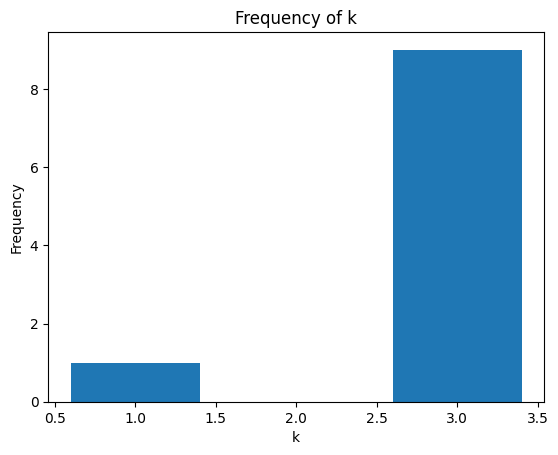

In [169]:
k_freq = calculate_freq(hyper_parameters, "n_neighbors")

# Plot the frequency of choosing each value of k
plt.bar(k_freq.keys(), k_freq.values())
plt.xlabel("k")
plt.ylabel("Frequency")
plt.title("Frequency of k")
plt.show()

For KNN 3 nearest neighbors is most often chosen

## Random Forest

In [170]:
# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num=2)]

# Create the random grid
param_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
}

rfc = RandomForestClassifier()
accuracy_scores, confusion_matrices, hyper_parameters = nested_cross_validate(
    rfc, param_grid, rice_df_features, rice_label)


In [171]:
rfc_max_acc = max(accuracy_scores) 
print(f"Best Accuracy {rfc_max_acc}")

for score, matrix, hyper_parameter in zip(accuracy_scores, confusion_matrices, hyper_parameters):
    print(f"Accuracy score: {score:.4f}\n")
    print(f"Confusion matrix:\n{matrix}\n")
    print(f"Hyper parameter: {hyper_parameter}\n")

Best Accuracy 1.0
Accuracy score: 0.9667

Confusion matrix:
[[29  1]
 [ 0  0]]

Hyper parameter: {'max_depth': 20, 'max_features': 'log2'}

Accuracy score: 0.9667

Confusion matrix:
[[ 0  0]
 [ 1 29]]

Hyper parameter: {'max_depth': 20, 'max_features': 'sqrt'}

Accuracy score: 0.9667

Confusion matrix:
[[29  1]
 [ 0  0]]

Hyper parameter: {'max_depth': 20, 'max_features': 'log2'}

Accuracy score: 0.9667

Confusion matrix:
[[10  0]
 [ 1 19]]

Hyper parameter: {'max_depth': 20, 'max_features': 'sqrt'}

Accuracy score: 0.9333

Confusion matrix:
[[ 0  0]
 [ 2 28]]

Hyper parameter: {'max_depth': 20, 'max_features': 'log2'}

Accuracy score: 0.9333

Confusion matrix:
[[ 0  0]
 [ 2 28]]

Hyper parameter: {'max_depth': 20, 'max_features': 'log2'}

Accuracy score: 0.9667

Confusion matrix:
[[10  0  0]
 [ 0  0  0]
 [ 0  1 19]]

Hyper parameter: {'max_depth': 20, 'max_features': 'sqrt'}

Accuracy score: 1.0000

Confusion matrix:
[[30]]

Hyper parameter: {'max_depth': 20, 'max_features': 'log2'}



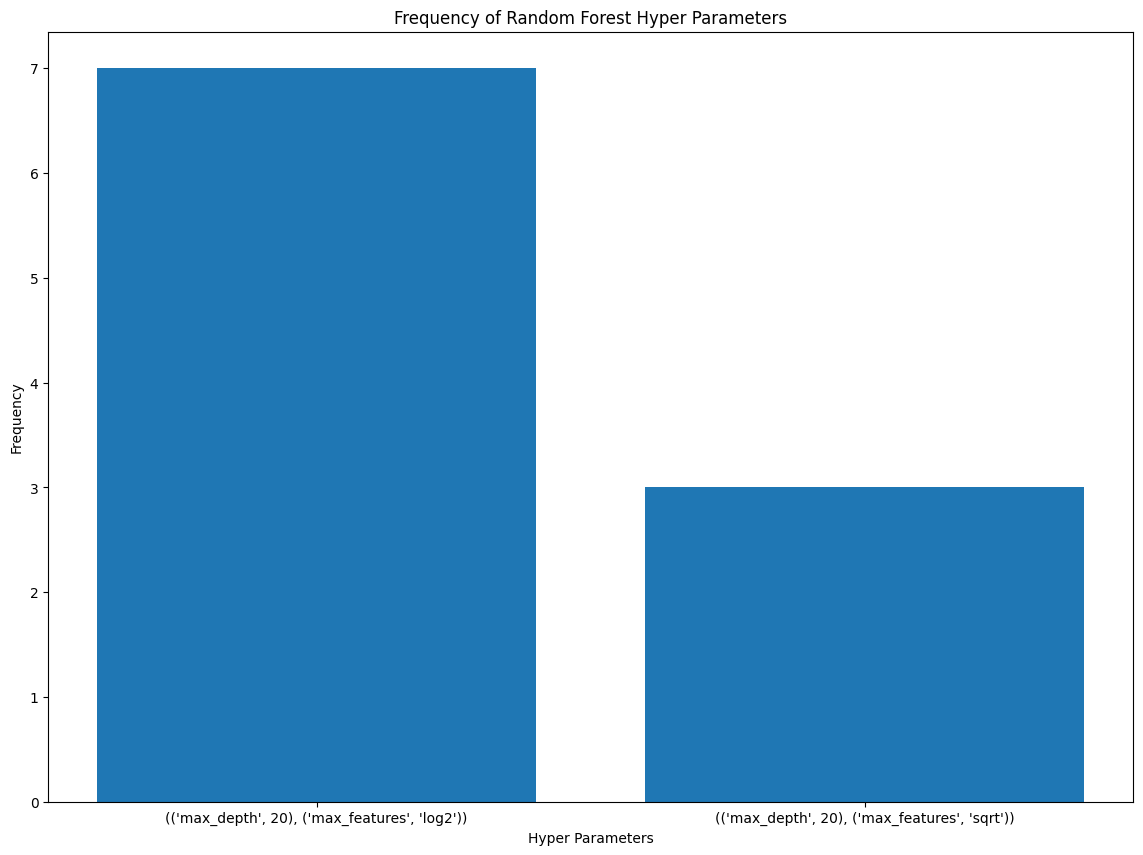

In [172]:
rfc_freq = calculate_freq_pairs(hyper_parameters,)

fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(range(len(rfc_freq)), list(rfc_freq.values()), align='center')

ax.set_xticks(range(len(rfc_freq)))
ax.set_xticklabels([str(freq) for freq in rfc_freq.keys()])

ax.set_xlabel("Hyper Parameters")
ax.set_ylabel("Frequency")

ax.set_title("Frequency of Random Forest Hyper Parameters")
plt.show()

## MLP

In [176]:
param_grid = {
    'activation': ["relu", "logistic"],
    'solver': ["sgd", "adam"],
    'validation_fraction': [0.1, 0.5],
}
mlp = MLPClassifier(hidden_layer_sizes=1, early_stopping=True)
accuracy_scores, confusion_matrices, hyper_parameters = nested_cross_validate(mlp, param_grid, rice_df_features, rice_label)

In [174]:
mlp_max_acc = max(accuracy_scores) 
print(f"Best Accuracy {mlp_max_acc}")
for score, matrix, hyper_parameter in zip(accuracy_scores, confusion_matrices, hyper_parameters):
    print(f"Accuracy score: {score:.4f}\n")
    print(f"Confusion matrix:\n{matrix}\n")
    print(f"Hyper parameter: {hyper_parameter}\n")

Best Accuracy 1.0
Accuracy score: 0.0000

Confusion matrix:
[[ 0 30]
 [ 0  0]]

Hyper parameter: {'activation': 'logistic', 'solver': 'sgd', 'validation_fraction': 0.5}

Accuracy score: 0.0000

Confusion matrix:
[[ 0 30]
 [ 0  0]]

Hyper parameter: {'activation': 'relu', 'solver': 'adam', 'validation_fraction': 0.1}

Accuracy score: 1.0000

Confusion matrix:
[[30]]

Hyper parameter: {'activation': 'relu', 'solver': 'sgd', 'validation_fraction': 0.5}

Accuracy score: 0.6667

Confusion matrix:
[[ 0 10]
 [ 0 20]]

Hyper parameter: {'activation': 'logistic', 'solver': 'sgd', 'validation_fraction': 0.1}

Accuracy score: 0.0000

Confusion matrix:
[[ 0  0]
 [30  0]]

Hyper parameter: {'activation': 'logistic', 'solver': 'adam', 'validation_fraction': 0.1}

Accuracy score: 1.0000

Confusion matrix:
[[30]]

Hyper parameter: {'activation': 'relu', 'solver': 'adam', 'validation_fraction': 0.1}

Accuracy score: 0.6333

Confusion matrix:
[[ 1  9]
 [ 2 18]]

Hyper parameter: {'activation': 'logistic

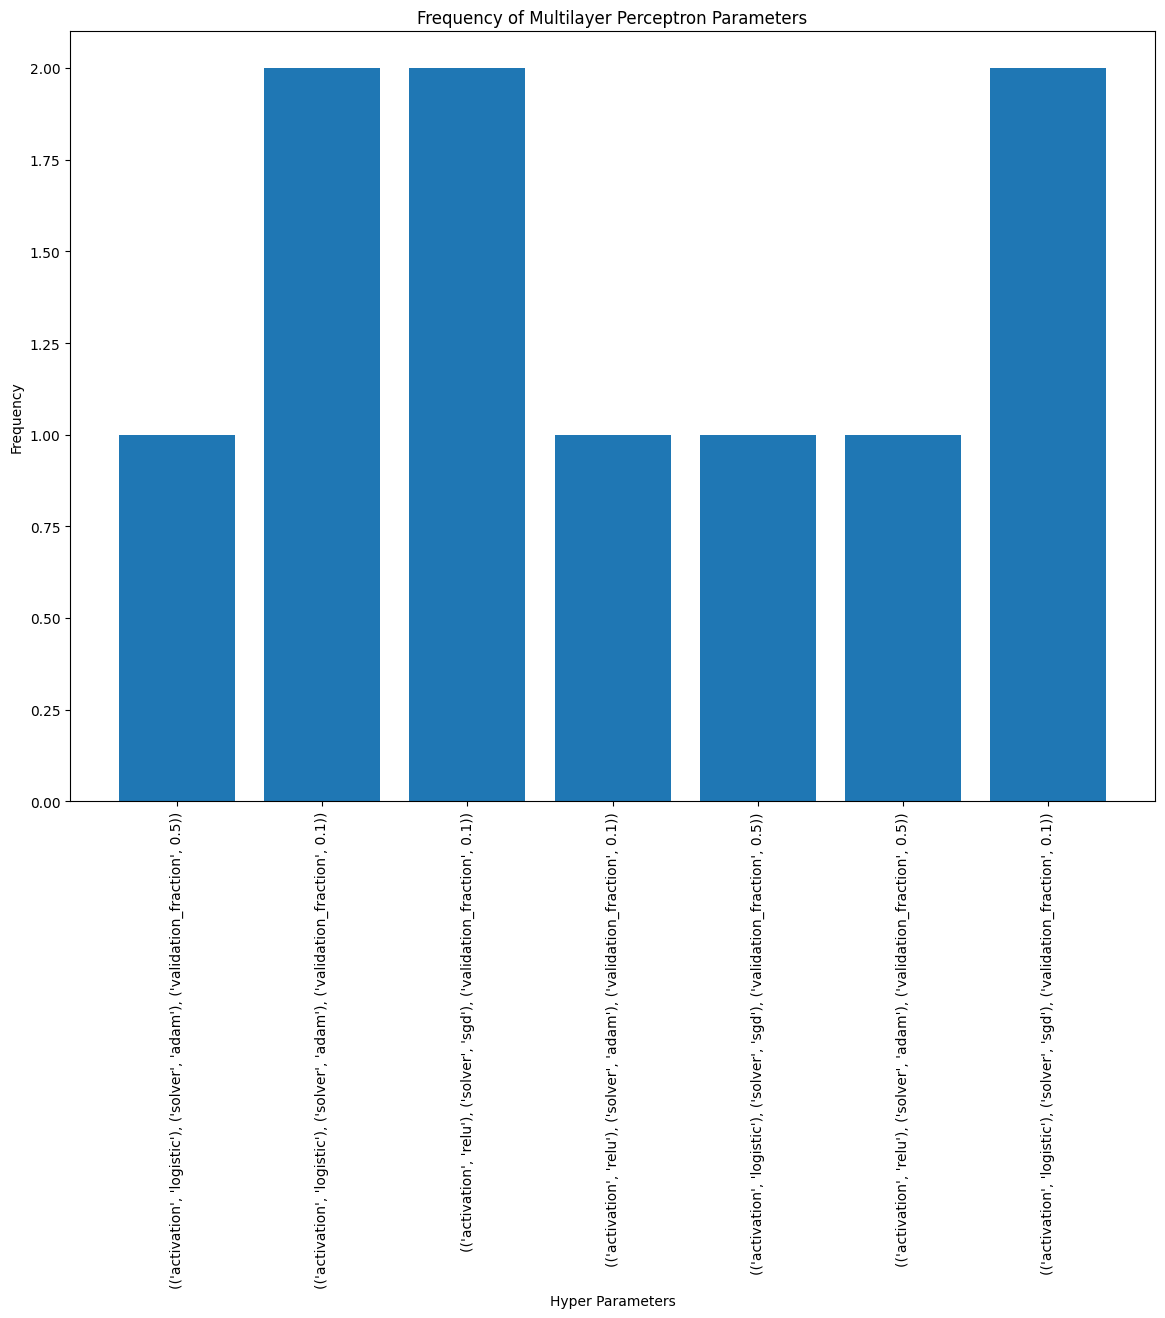

In [177]:
mlp_freq = calculate_freq_pairs(hyper_parameters,)

fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(range(len(mlp_freq)), list(mlp_freq.values()), align='center')

ax.set_xticks(range(len(mlp_freq)))
ax.set_xticklabels([str(freq) for freq in mlp_freq.keys()],rotation=90,)

ax.set_xlabel("Hyper Parameters")
ax.set_ylabel("Frequency")

ax.set_title("Frequency of Multilayer Perceptron Parameters")
plt.show()

Discuss you results

- Which model performs the best? Why?
- Ponder the limitations and generalization of the models. How well will the classifiers perform for data outside this data set?
- Compare your results with the original article. Are they comparable?
- Ponder applications for these type of models (classifying rice or other plant species), who could benefit from them? Ponder also what would be interesting to study more on this area?
- What did you learn? What was difficult? Could you improve your own working process in some way?

- In this case both random forest and mlp perform somewhat similarly with accuracy reaching 100 percent and knn accuracy reaching ~97%.
  - Random forest and mlp both have multiple hyperparameter which have been fined tuned to this dataset.
- Due to the limited amount of data it can difficult to say wether these model can be used in real life scenarios. Given the high accuracies due to fine hyperparameter tuning it would difficult to say how well they would perform on data outside the dataset but they might perform fairly reasonable.
- The original article goes over many algorithms and we have used three of them and given the given the result they are similar to the article i.e random forest and mlp perform better than knn.
- Classification of rice and other plant species using Machine learning tools can significantly help authorities such as imports/exports industries for maintaining quality and content of the goods.
- There are several ways to solve a problem and machine learning tools can greatly increase the quality of processes. 
- The approach could be improved by using feature selection algorithms to reduce the number of features used this can be helpful in using this application where processing power is limited.
